# Logistic Regression (~ 100 min)

![title](1.png)

In this notebook we will explore and work on the Iris dataset (that deals with different types of the iris flower). The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. Further information for which can be found at https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html Image Source: Unwin, Antony, and Kim Kleinman. "The iris data set: In search of the source of virginica." Significance 18.6 (2021): 26-29. First we have to import some libraries:

In [36]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings 
#Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ToDo (15 min):

What is each library helpful for? (You can use Google to familiarise yourself with the libraries)
Which of the lines above imports a package? Which imports a function?

#Loading the Data (10 min)

Use the load_iris function we have imported in the previous step to load the dataset (note that the function returns the dataset, which has to be saved into a variable).

Create a pandas dataframe object containing the features (the iris['data']) and the target values (iris[target]). Please note that column names correspond to feature names (iris['feature_names]), and an additional column is necessary for the target value.

Familiarise yourself with the dataset. How many different varieties of iris are included in this dataset?
You can use pd.head() to print the first 5 records of the dataset. 
You can use column_example.unique() to find all the unique elements in the example column of the pandas dataframe

load the data and know how many classes are there (target column)

In [2]:
#ToDo: Load the dataset
iris = load_iris()
#ToDo: Create pandas DataFrame based on dataset
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#ToDo: Print the different possible target values 
print(dataset['target'].unique())
#ToDo: Print the first 5 records of the dataset
dataset.head()

[0. 1. 2.]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Data Exploration (15 min)

A table of numbers is not useful for interpreting dependencies between variables. So let's plot the data we have and see which features correlate with each other.

We will use 2 different types of plots: Scatter plots and histograms. What is the difference? Familiarize ureself with these kind of plots in the matplot library.
As we have 14 different features and we want to plot the correlation between each feature, we need a total of 196 plots. Fill in the missing parts in the code below. You can use axs[COLUMN_INDEX, ROW_INDEX] to select a subplot.

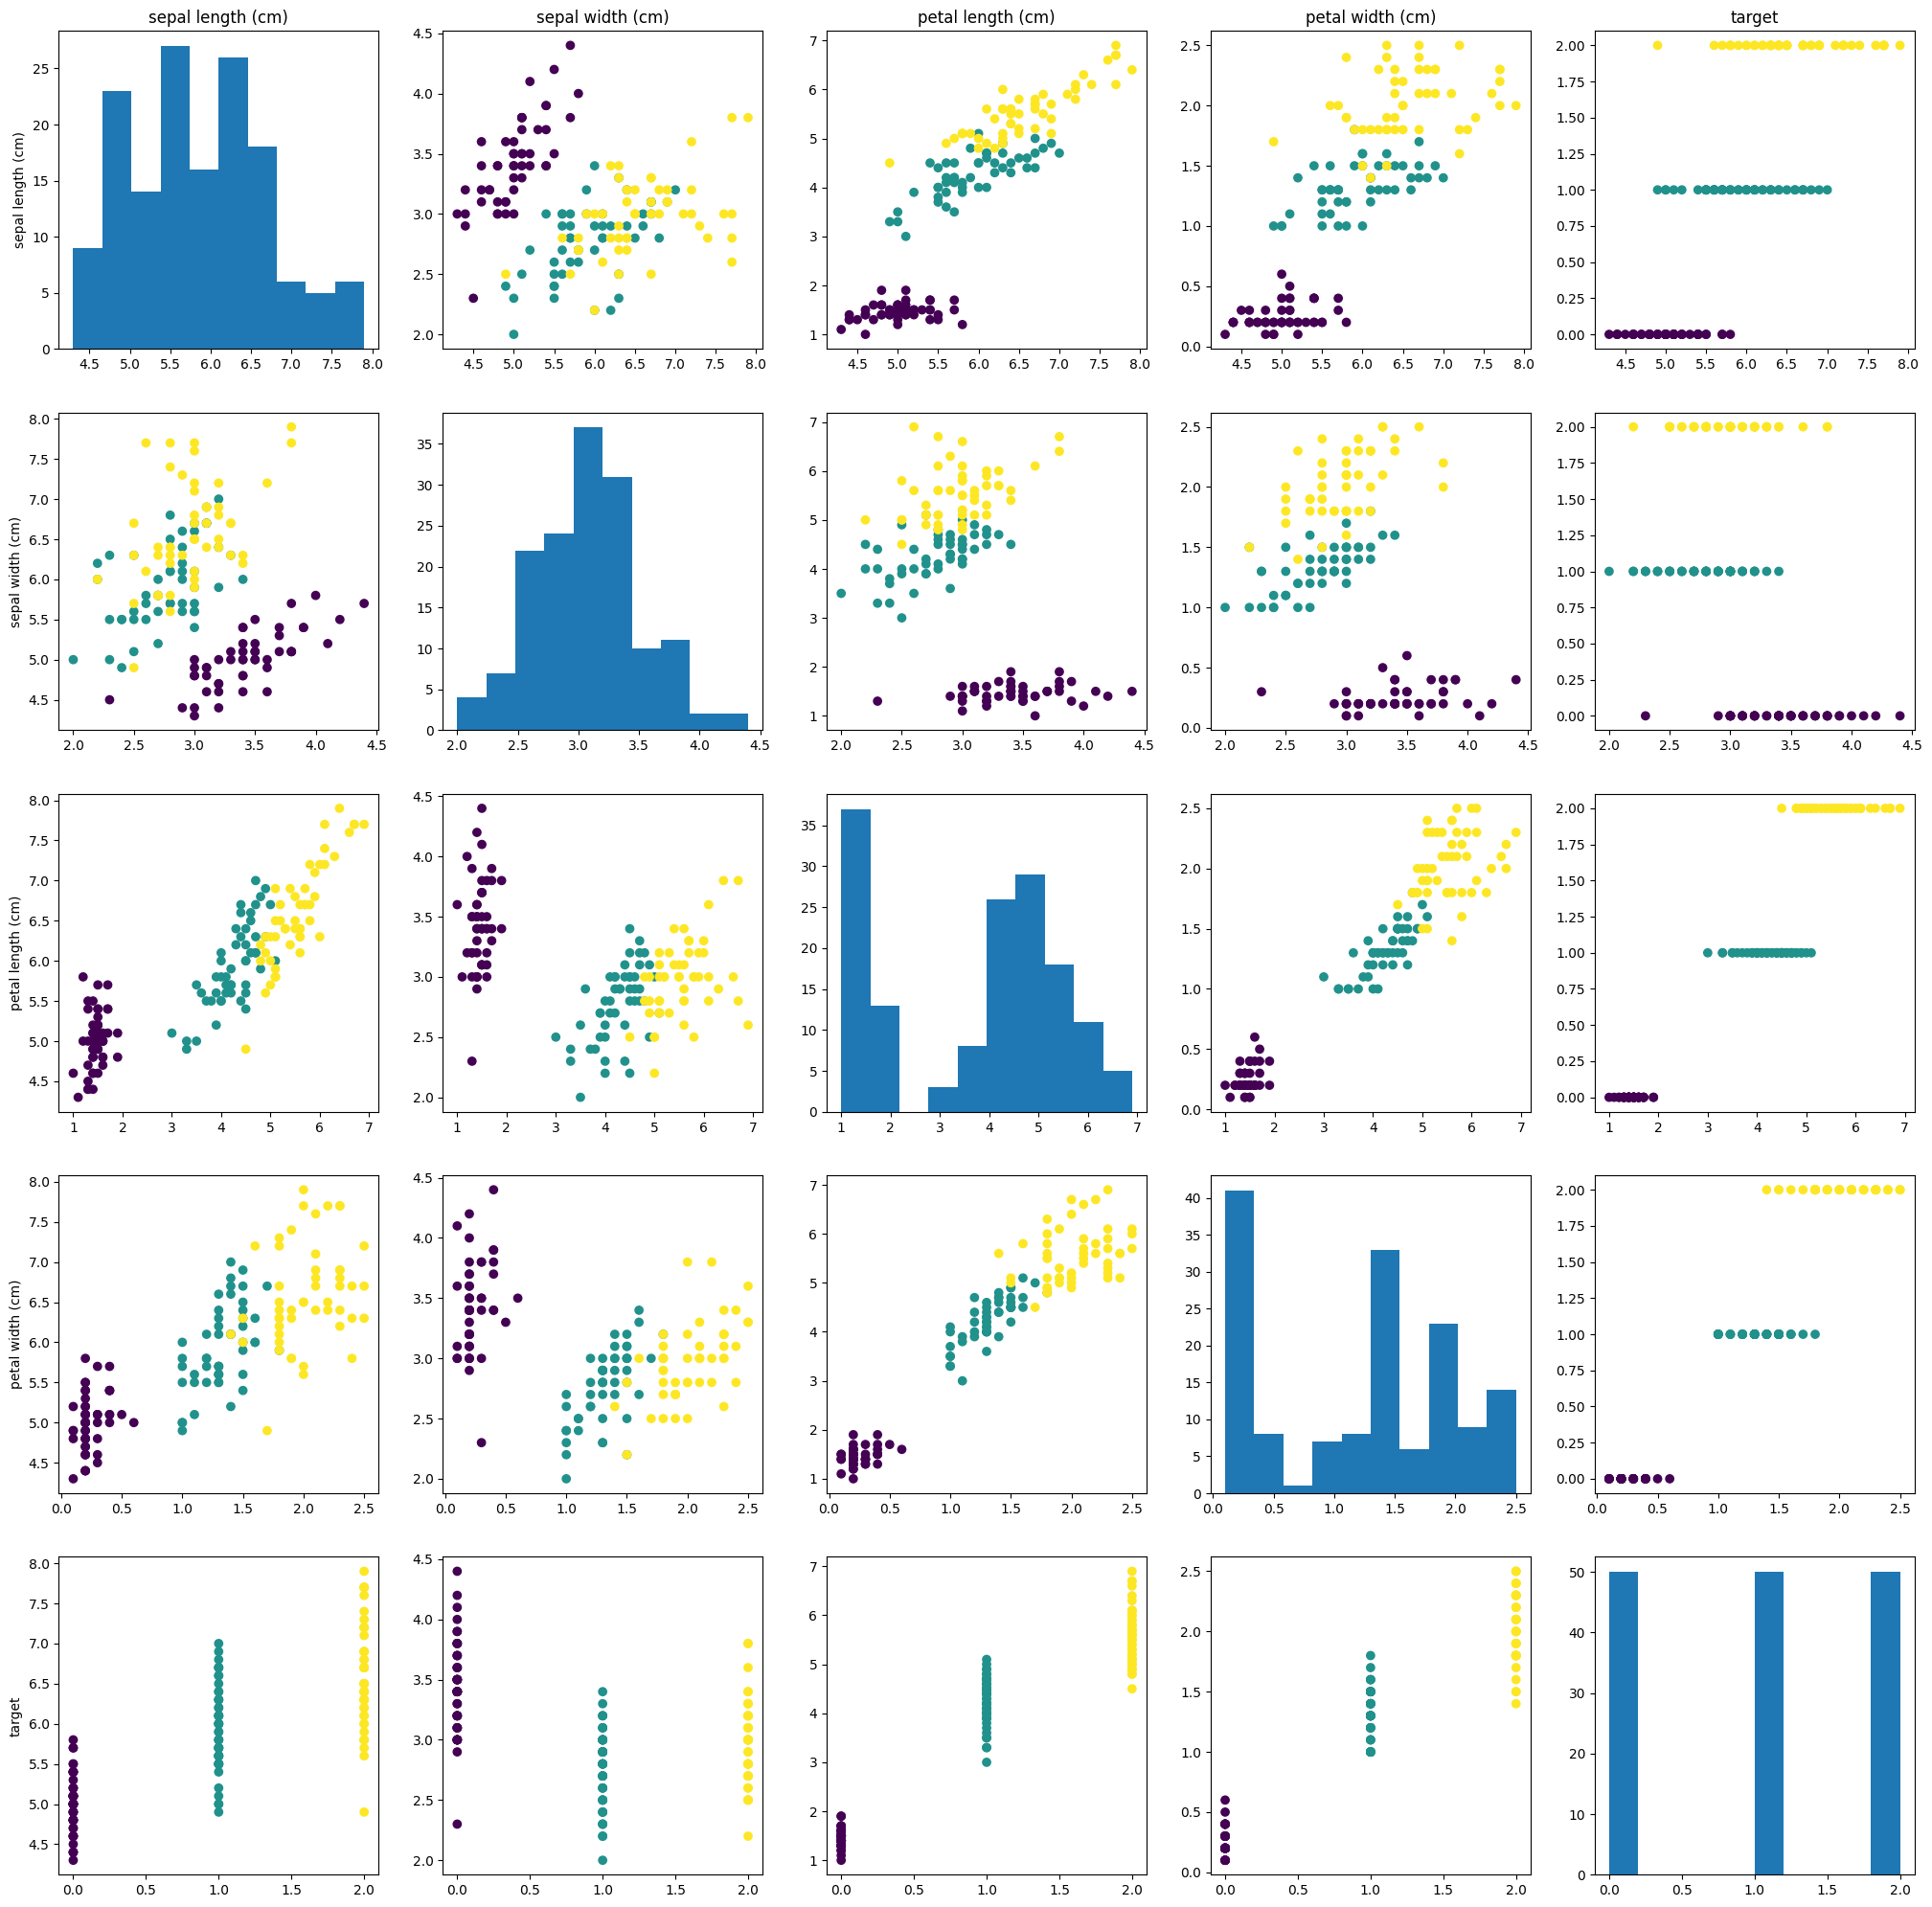

In [3]:
fig, axs = plt.subplots(len(dataset.columns), len(dataset.columns), figsize=(25, 25))

for i in range(len(dataset.columns)):
    for j in range(len(dataset.columns)):
        if i == j:
            #ToDo: plot the histogram of column i on axis i, j (via the .hist() function)
            axs[i,j].hist(dataset[dataset.columns[i]])
        else:
            #ToDo: scatter plot the data points with column i as x and column j as y,
            #with the color of the dot defined by target value 
            axs[i,j].scatter(dataset[dataset.columns[i]], dataset[dataset.columns[j]], c=dataset.target)
        axs[0,j].set_title(dataset.columns[j])
    axs[i,0].set(ylabel=dataset.columns[i])

plt.show()

For our task analysis and future prediction it is also important to calculate which features are correlated with the target value and which features are correlated between themselves. We can visualise it for ourselves in a helpful way as a correlation matrix.

The correlation matrix (for more details https://www.displayr.com/what-is-a-correlation-matrix/#:~:text=A%20correlation%20matrix%20is%20a,a%20diagnostic%20for%20advanced%20analyses) "is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses."

In a correlation matrix we represent the correlation as a number (correlation coefficient)

You can use a_pandas_dataframe.corr() to compute the correlation matrix.

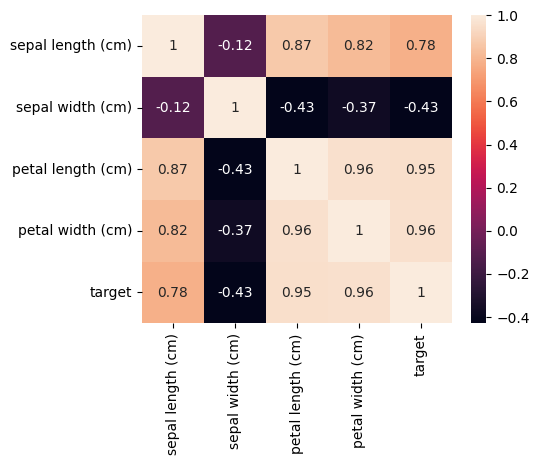

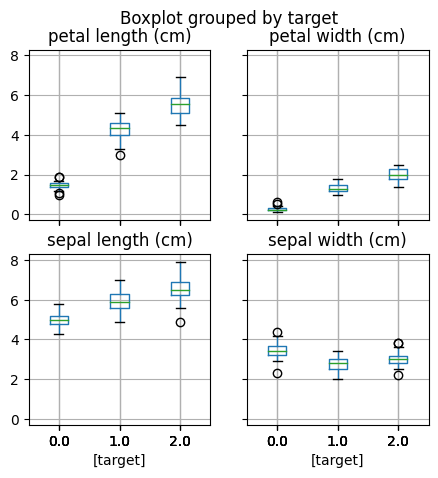

In [4]:
correlation_matrix = dataset.corr().round(2)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax) # annot = True to print the values inside the square
plt.show()
dataset.boxplot(by="target", figsize=(5,5))
plt.show()

# Training the model (15 min)

In machine learning, the performance of any model is usually checked using a test set, which is a set of data not used in the training process. This makes the evaluation more trustworthy.

We will split the dataset randomly into train and test set, with the test set including 25% of the data.

Note that we have imported the function train_test_split from the sklearn module, submodel model_selection.

In [5]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, [0,1,2, 3]].values
y = dataset.iloc[:, 4].values

#ToDo split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Before we can train the classifier, we need to create and initialise the classifier object (in this case, LogisticRegression object). 

You can use the classifier.fit() function to fit the classifier on the training set.

In [6]:
# Fitting Logistic Regression to the Training set
#ToDo: create and initialise the classifier
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
#ToDo: fir the classifier to the train set
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Evaluation of the classifier (15 min)

After fitting the model, we need to evaluate the performance of the trained model to decide if the complexity of the method or amount of training data is sufficient.

The process has several steps:
1. Use the trained model to predict the target values of the test set.
2. Predict the probabilities for each target class on the test set using the trained model.
3. Compare the probabilities returned to the correct result
4. Create a confusion matrix

We can use classifer.predict() to get the predictions as one number.
We can use classifier.predict_proba() to get get the prediction in the form of probabilities for each target class.

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results
probs_y = np.round(probs_y, 2)


In [8]:
#We plot a table with target results, predicted class and probabilities for each class for every data point
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2.0        | 2.0        | 0.0        | 0.03          | 0.97      
1.0        | 1.0        | 0.01       | 0.95          | 0.04      
0.0        | 0.0        | 1.0        | 0.0           | 0.0       
2.0        | 2.0        | 0.0        | 0.08          | 0.92      
0.0        | 0.0        | 0.98       | 0.02          | 0.0       
2.0        | 2.0        | 0.0        | 0.01          | 0.99      
0.0        | 0.0        | 0.98       | 0.02          | 0.0       
1.0        | 1.0        | 0.01       | 0.71          | 0.28      
1.0        | 1.0        | 0.0        | 0.73          | 0.27      
1.0        | 1.0        | 0.02       | 0.89          | 0.08      
2.0        | 2.0        | 0.0        | 0.44          | 0.56      
1.0        | 1.0        | 0.02       | 0.76          | 0.22      
1.0        | 1.0        | 0.01       | 0.85          | 0.13      
1.0     

The performance of our classifier may not be consistent across classes (for example, certain classes could be easily prediced, but the other constantly misclassified).

A confusion matrix allows us to see how distinct each class is from the other.

Each row shows the actual class and each column shows the predicted class (the number at intersection of row r and column c shows how often our model predicts a point in class r as belonging to class c). The name comes from the fact that with this matrix it easy to see how often our classifier confuses any two classes.

You can use the confusion_matrix() function imported from sklearn.metrics to compute the confusion matrix
You can use the heatmap() from the seaborn module to visualise the confusion matrix in the form of a heatmap (matrix of values where the color of each cell depends on the value).

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


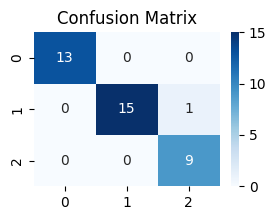

<Figure size 500x500 with 0 Axes>

In [9]:
#ToDo:  compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm) #print confusion matrix
fig, ax = plt.subplots(figsize=(3,2))

#ToDo: visualise the confusion matrix
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.figure(figsize = (5,5))
plt.show()

# Logistic Regression on MNIST (20 min, extra task)


MNIST (https://www.tensorflow.org/datasets/catalog/mnist) is a handwritten digit recognition dataset, where every image represents a number from 0 to 9 written by hand.

It provides an example closer to real life, and presents more of a challenge to classify due to the larger amount of features per data point and the larger number of possible classes.

To download the dataset, we will use data loaders.


In [10]:
#Load MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
images, labels = mnist['data'], mnist['target']



In [33]:
labels_test.keys()

Int64Index([10840, 56267, 14849, 62726, 47180, 61640, 52730, 21847, 20394,
            45806,
            ...
             6482, 64626, 22856, 48528, 63858, 46143,  5719, 68531, 15063,
            16576],
           dtype='int64', length=17500)

In [11]:
#ToDo: split into train and test set

#ToDo split the dataset into train and test
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size = 0.25, random_state = 0)

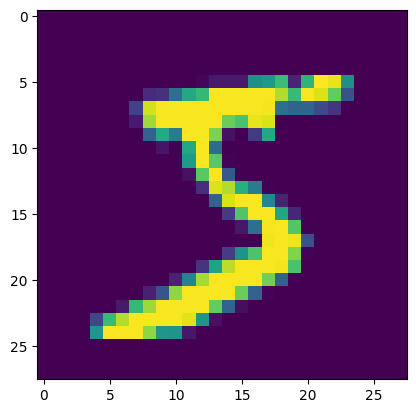

In [12]:
images = np.array(images)
plt.imshow(images[0].reshape(28, 28))


# MNIST Data exploration

To better understand the dataset, we can visualise several images from the training data

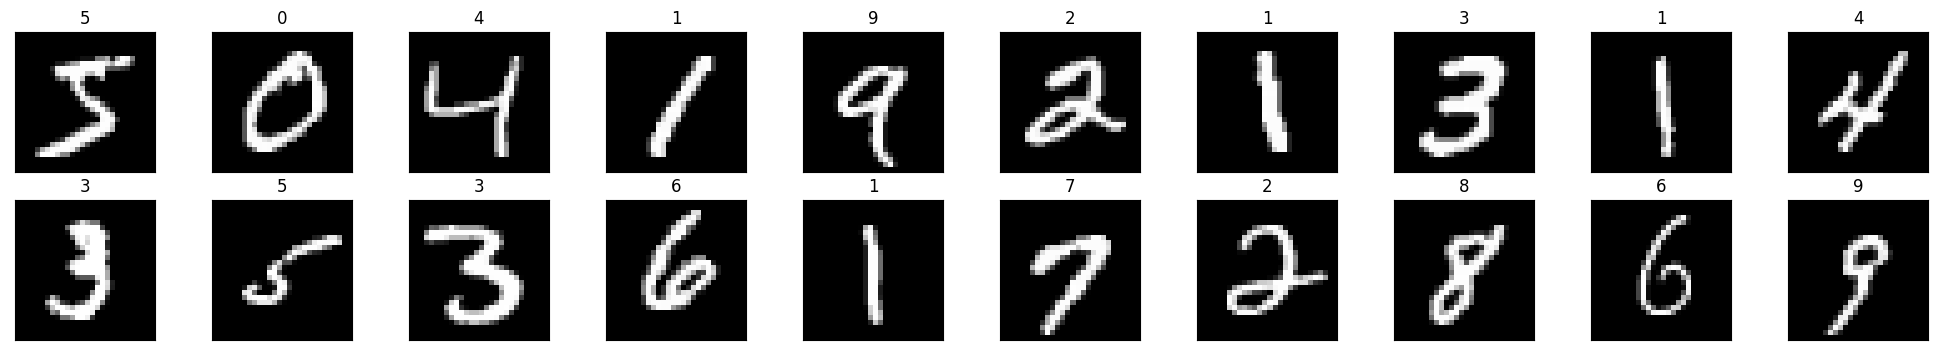

In [13]:
#import matplotlib.pyplot as plt

# Plot the images in the batch, along with the true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].reshape(28, 28)), cmap='gray')
    ax.set_title(labels[idx])
     

After understanding what kind of images the dataset generally has, we should explore one image in more detail.

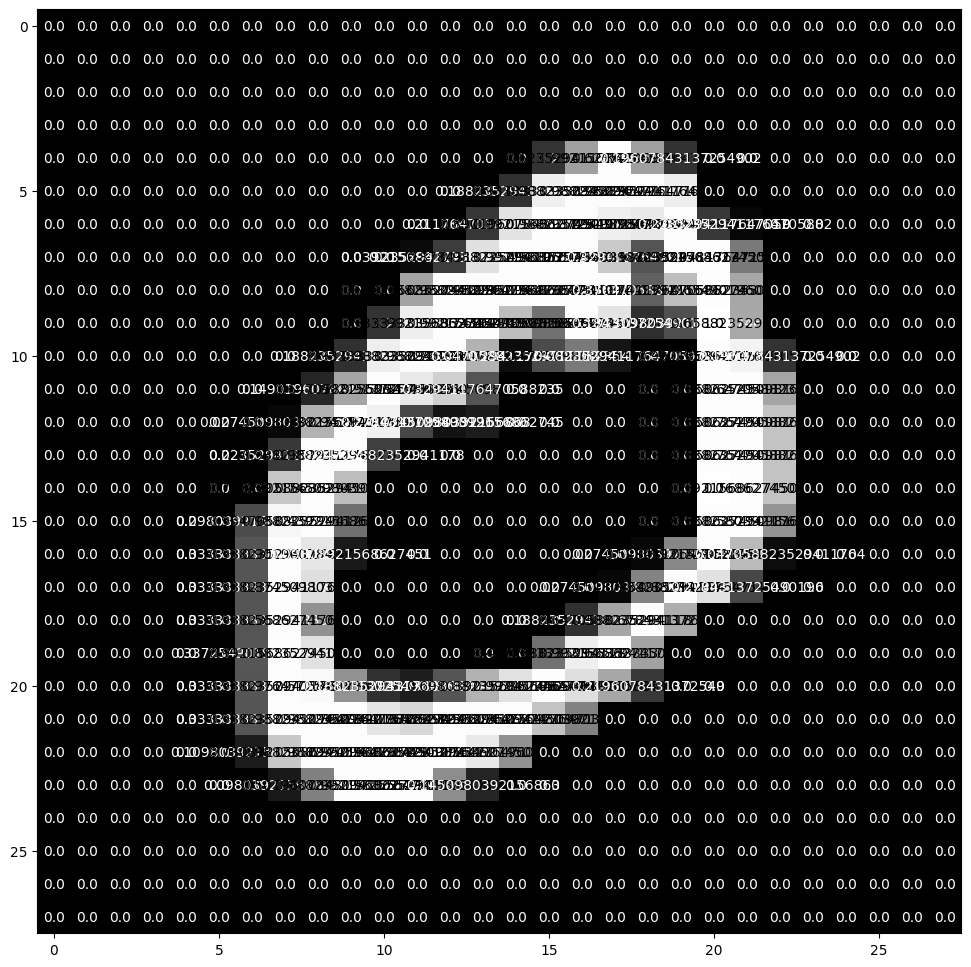

In [14]:
img = np.squeeze(images[1].reshape(28, 28))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max() / 2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val/255), xy=(y, x), horizontalalignment='center', verticalalignment='center',
                    color='white' if img[x][y] < thresh else 'black')


The MNIST dataset presents more of a challenge, let's repeat the training process from the iris dataset on the newly loaded MNIST dataset

In [15]:
#Fit a model to MNIST

#ToDo: create and initialise the classifier
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
#ToDo: fit the classifier to the train set
classifier.fit(images_train, labels_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Let us evaluate the performance of our classifier. We expect the performance to be worse, as the problem is now more complex.
This shows the necessity for more complicated machine learning methods.

In [54]:
#Evaluate the model on MNIST dataset
#We will have to limit the number of samples for ease of visualisation

# Predicting the Test set results
y_pred = classifier.predict(images_test)

# Predict probabilities
probs_y=classifier.predict_proba(images_test)
### Print results
probs_y = np.round(probs_y, 2)

#Limit the number of elements
y_pred_small = y_pred[:10]
probs_y_small = probs_y[:10]
labels_test_small = labels_test[:10]

res = "{:<5}| {:<5} | {:<5} | {:<5} | {:<5} | {:<5} | {:<5} | {:<5} | {:<5}| {:<5} | {:<5} | {:<5} ".format("Label ", "Pred ", "0(%)", "1(%)", "2(%)", "3(%)", "4(%)", "5(%)", "6(%)", "7(%)", "8(%)", "9(%)")
res += "\n"+"-"*90+"\n"
res += "\n".join("{:<5} | {:<5} | {:<5} | {:<5} | {:<5} | {:<5} | {:<5} | {:<5} | {:<5}| {:<5} | {:<5} | {:<5} ".format(x, y, a, b, c, d, e, f, g, h, i, j) for x, y, a, b, c, d, e, f, g, h, i, j in zip(labels_test_small, y_pred_small, probs_y_small[:,0], probs_y_small[:,1], probs_y_small[:,2], probs_y_small[:,3], probs_y_small[:,4], probs_y_small[:,5], probs_y_small[:,6], probs_y_small[:,7], probs_y_small[:,8], probs_y_small[:,9]))
res += "\n"+"-"*90+"\n"
print(res)

Label | Pred  | 0(%)  | 1(%)  | 2(%)  | 3(%)  | 4(%)  | 5(%)  | 6(%) | 7(%)  | 8(%)  | 9(%)  
------------------------------------------------------------------------------------------
0     | 0     | 0.89  | 0.0   | 0.0   | 0.0   | 0.0   | 0.0   | 0.09 | 0.0   | 0.01  | 0.0   
4     | 4     | 0.0   | 0.0   | 0.0   | 0.0   | 1.0   | 0.0   | 0.0  | 0.0   | 0.0   | 0.0   
1     | 1     | 0.0   | 1.0   | 0.0   | 0.0   | 0.0   | 0.0   | 0.0  | 0.0   | 0.0   | 0.0   
2     | 2     | 0.0   | 0.0   | 0.99  | 0.0   | 0.0   | 0.0   | 0.0  | 0.0   | 0.01  | 0.0   
7     | 4     | 0.0   | 0.0   | 0.0   | 0.0   | 0.52  | 0.0   | 0.0  | 0.45  | 0.0   | 0.03  
9     | 7     | 0.0   | 0.0   | 0.09  | 0.0   | 0.11  | 0.0   | 0.02 | 0.61  | 0.0   | 0.16  
7     | 7     | 0.0   | 0.0   | 0.0   | 0.0   | 0.0   | 0.0   | 0.0  | 1.0   | 0.0   | 0.0   
1     | 1     | 0.0   | 0.91  | 0.0   | 0.0   | 0.0   | 0.0   | 0.0  | 0.0   | 0.08  | 0.0   
1     | 1     | 0.0   | 0.94  | 0.05  | 0.0   | 0.0   | 0.0   |

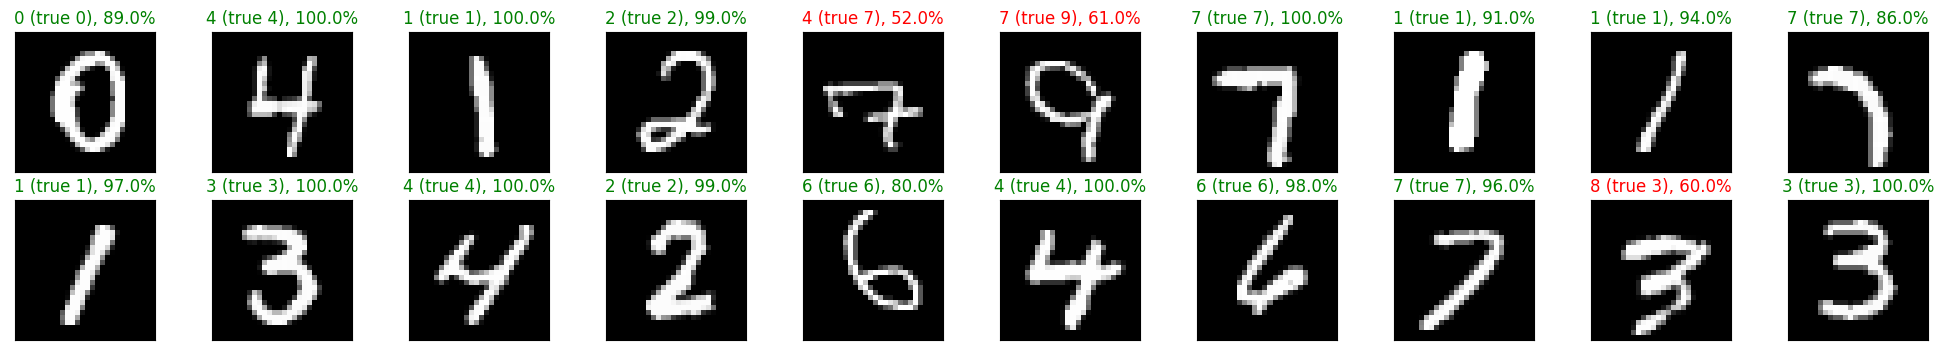

In [35]:
#Visualise the input and prediction (same as input but predicted with percentages)
# Plot the images in the batch, along with the true labels
#fig = plt.figure(figsize=(25, 4))
#for idx in np.arange(20):
#    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
#    ax.imshow(np.squeeze(np.array(images_test)[idx].reshape(28, 28)), cmap='gray')
#    ax.set_title("{} ({}%)".format(y_pred[idx], probs_y[idx][int(y_pred[idx])]*100))
    
    


# Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(np.array(images_test)[idx].reshape(28, 28)), cmap='gray')
    ax.set_title("{} (true {}), {}%".format(str(y_pred[idx]), str(labels_test[labels_test.keys()[idx]]), probs_y[idx][int(y_pred[idx])]*100),
                 color=("green" if y_pred[idx] == labels_test[labels_test.keys()[idx]] else "red"))